<a href="https://colab.research.google.com/github/karthikjosyula/MSDS_ComputerVision/blob/master/FashionMNISTModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data

There are ten categories to classify in the fashion_mnist dataset:

Label Description
0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

In [0]:
#loading fashion_mnist data 
from tensorflow import keras
import numpy as np
import pandas as pd
from keras.datasets import fashion_mnist
import theano
from keras.layers.convolutional import Convolution2D
from keras.layers.core import Activation
import matplotlib.pyplot as plt
%matplotlib inline
#loading mnist data
(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


shape of the data

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Data normalization : The image data is encoded as integers in the 0-255 range, encoding grayscale values. Before we feed  this data to our netwrok, we need to cast it to float32 a d divide by 255, so that, we end up with floating point values in the 0-1 range. This is done to balance out initial weights which might be relatively small compared to the initial input values. This is also done to prevent from large gradient updates that will prevent our network from converging - much needed for a classification problem. 


In [0]:
# Normalizing the input
X_train= X_train.reshape(X_train.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_train/=255
X_test = X_test.reshape(X_test.shape[0],28,28,1)
X_test = X_test.astype('float32')
X_test/=255
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


using Seaborn to draw a histogram to look at data samples for each category

There are 60000 training data and 10000 testing data
Number of occurence for each number in training data (0 stands for 10):
[[   0 6000]
 [   1 6000]
 [   2 6000]
 [   3 6000]
 [   4 6000]
 [   5 6000]
 [   6 6000]
 [   7 6000]
 [   8 6000]
 [   9 6000]]


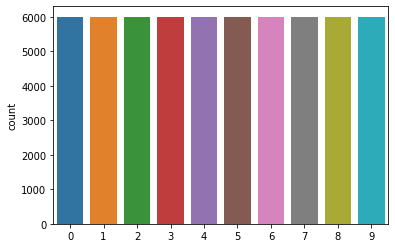

In [0]:
import seaborn as sns
print('There are', X_train.shape[0], 'training data and', X_test.shape[0], 'testing data')
print('Number of occurence for each number in training data (0 stands for 10):')
print(np.vstack((np.unique(y_train), np.bincount(y_train))).T)
sns.countplot(y_train)

Plotting the first 36 images in fashion MNIST data

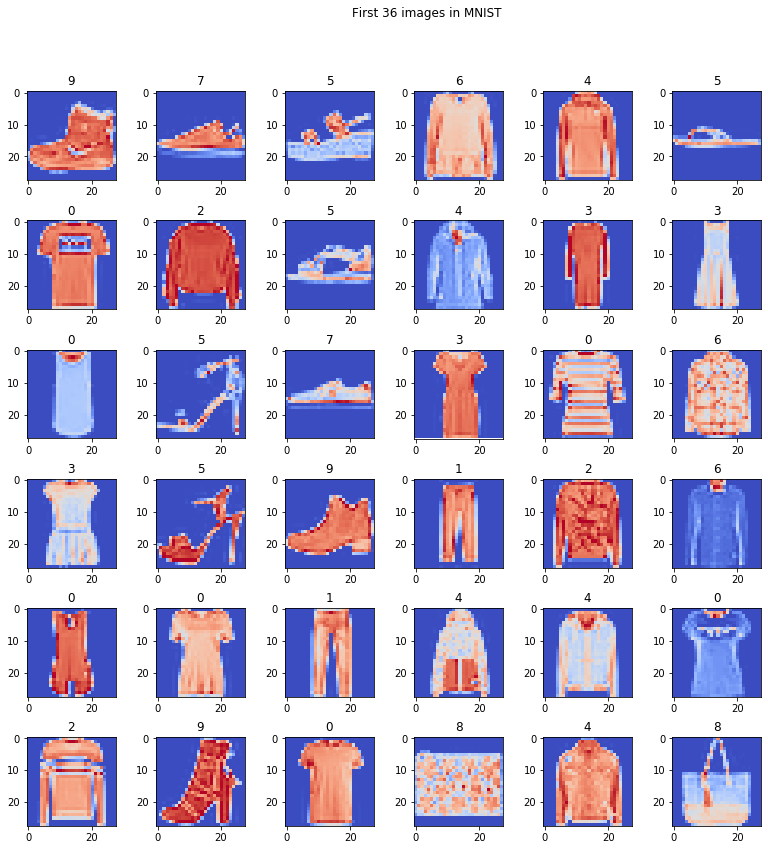

In [0]:
# plot first 36 images in Fashion MNIST
fig, ax = plt.subplots(6, 6, figsize = (12, 12))
fig.suptitle('First 36 images in MNIST')
fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
for x, y in [(i, j) for i in range(6) for j in range(6)]:
    ax[x, y].imshow(X_train[x + y * 6].reshape((28, 28)), cmap = 'coolwarm')
    ax[x, y].set_title(y_train[x + y * 6])

Converting the output variables to categorical using onehot encoding

In [0]:
from  keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test= np_utils.to_categorical(y_test)
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Adding sequential from keras.models for the classifier

In [0]:
from keras.models import Sequential
classifier=tf.keras.Sequential()

Defining the model with the needed layers

In [0]:
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, MaxPool2D
from tensorflow.python.keras.layers import Conv2D, BatchNormalization

ActRelu = Activation('relu')
ActSoftmax = Activation('softmax')

FirstConv2DLayer = Conv2D(32, (3,3), input_shape=(28,28,1))
classifier.add(FirstConv2DLayer)
BatchNormalization(axis=-1) #Axis -1 is always features axis
classifier.add(ActRelu)
 
classifier.add(Conv2D(32, (3,3)))
BatchNormalization(axis=-1)
classifier.add(ActRelu)

classifier.add(MaxPool2D(pool_size=(2,2)))
BatchNormalization(axis=-1)
classifier.add(Conv2D(64, (3,3)))
BatchNormalization(axis=-1)
classifier.add(ActRelu)

classifier.add(Conv2D(64, (3,3)))
classifier.add(ActRelu)

classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Flatten())
BatchNormalization()
classifier.add(Dense(512))
BatchNormalization()
classifier.add(ActRelu)

classifier.add(Dropout(0.2))
classifier.add(Dense(10))
classifier.add(ActSoftmax)

summary of the model

In [0]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0

Compiling the model 

In [0]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Rotating the images randomly to make the model not memorize the false patterns. This would minimize overfitting and generilize the model more.

In [0]:
from keras.preprocessing.image import ImageDataGenerator
# applying transformation to image
train_gen = ImageDataGenerator(rotation_range=8, 
                               width_shift_range=0.08, 
                               shear_range=0.3, 
                               height_shift_range=0.08, 
                               zoom_range=0.08 )
test_gen = ImageDataGenerator()

In [0]:
training_set= train_gen.flow(X_train, y_train, batch_size=64)
test_set= train_gen.flow(X_test, y_test, batch_size=64)

In [0]:
classifier_fashionMNSIT = classifier.fit_generator(training_set, 
                         steps_per_epoch=60000//64, 
                         validation_data= test_set, 
                         validation_steps=10000//64, 
                         epochs=25)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 937 steps, validate for 156 steps
Epoch 1/25
937/937 [==============================] - 178s 190ms/step - loss: 0.6223 - accuracy: 0.7628 - val_loss: 0.4688 - val_accuracy: 0.8280
Epoch 2/25
937/937 [==============================] - 177s 189ms/step - loss: 0.4186 - accuracy: 0.8412 - val_loss: 0.3744 - val_accuracy: 0.8586
Epoch 3/25
937/937 [==============================] - 178s 190ms/step - loss: 0.3517 - accuracy: 0.8686 - val_loss: 0.3506 - val_accuracy: 0.8657
Epoch 4/25
937/937 [==============================] - 177s 189ms/step - loss: 0.3227 - accuracy: 0.8796 - val_loss: 0.3376 - val_accuracy: 0.8750
Epoch 5/25
937/937 [==============================] - 179s 191ms/step - loss: 0.2997 - accuracy: 0.8888 - val_loss: 0.2998 - val_accuracy: 0.8914
Epoch 6/25
937/937 [==============================] - 178s 190ms/step - loss: 0.2857 - accuracy: 0.8

Looking at the weights of the neurons at different layers. 

In [0]:
classifier.layers[0].get_weights()[0]

array([[[[-1.16975300e-01, -1.70464143e-01, -3.98866445e-01,
           1.68142751e-01, -1.38201654e-01, -9.75831226e-02,
          -4.41897698e-02,  5.40023707e-02,  1.48683771e-01,
           1.32657498e-01, -1.24035232e-01, -2.71858513e-01,
           2.27658093e-01, -1.91025719e-01, -1.30676314e-01,
          -2.61569738e-01,  7.71522149e-02,  1.60528436e-01,
          -3.38634402e-01, -1.13130540e-01, -3.92073877e-02,
          -4.34673131e-01, -2.00054526e-01,  1.14066437e-01,
           9.10599828e-02,  7.65215978e-02,  5.27301384e-03,
          -1.24927104e-01,  7.03053996e-02, -1.50353864e-01,
          -1.94948190e-03, -1.74020559e-01]],

        [[-3.79130036e-01, -1.78090259e-01,  2.46994477e-03,
           1.74934059e-01, -2.28151619e-01,  1.18612580e-01,
          -2.85745233e-01, -2.61370271e-01, -1.42630756e-01,
           1.15735121e-01, -1.38205439e-01,  1.67263150e-01,
          -6.52517527e-02, -1.00935861e-01, -4.93212529e-02,
          -1.08525321e-01,  2.38058209

In [0]:
for i in range(len(classifier.get_weights())):
    print(i, "\t", len(classifier.get_weights()[i]), "\t", classifier.layers[i])

0 	 3 	 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7efb370df9b0>
1 	 32 	 <tensorflow.python.keras.layers.core.Activation object at 0x7efb47b649e8>
2 	 3 	 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7efb3715de10>
3 	 32 	 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7efb37136d68>
4 	 3 	 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7efb3714aa20>
5 	 64 	 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7efb3719e4e0>
6 	 3 	 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7efb370abc88>
7 	 64 	 <tensorflow.python.keras.layers.core.Flatten object at 0x7efb370abf28>
8 	 1024 	 <tensorflow.python.keras.layers.core.Dense object at 0x7efb3711c128>
9 	 512 	 <tensorflow.python.keras.layers.core.Dropout object at 0x7efb3711cdd8>
10 	 512 	 <tensorflow.python.keras.layers.core.Dense object at 0x7efb3711c390>
11 	 10 	 <tensorflow.python.keras.layers.core.Activation object at 0x7e

In [0]:
for layer in classifier.layers:
    print(layer.name, "\n", layer.get_weights())

conv2d 
 [array([[[[-1.16975300e-01, -1.70464143e-01, -3.98866445e-01,
           1.68142751e-01, -1.38201654e-01, -9.75831226e-02,
          -4.41897698e-02,  5.40023707e-02,  1.48683771e-01,
           1.32657498e-01, -1.24035232e-01, -2.71858513e-01,
           2.27658093e-01, -1.91025719e-01, -1.30676314e-01,
          -2.61569738e-01,  7.71522149e-02,  1.60528436e-01,
          -3.38634402e-01, -1.13130540e-01, -3.92073877e-02,
          -4.34673131e-01, -2.00054526e-01,  1.14066437e-01,
           9.10599828e-02,  7.65215978e-02,  5.27301384e-03,
          -1.24927104e-01,  7.03053996e-02, -1.50353864e-01,
          -1.94948190e-03, -1.74020559e-01]],

        [[-3.79130036e-01, -1.78090259e-01,  2.46994477e-03,
           1.74934059e-01, -2.28151619e-01,  1.18612580e-01,
          -2.85745233e-01, -2.61370271e-01, -1.42630756e-01,
           1.15735121e-01, -1.38205439e-01,  1.67263150e-01,
          -6.52517527e-02, -1.00935861e-01, -4.93212529e-02,
          -1.08525321e-01,  

In [0]:
# Visualizating filters
from tensorflow.keras import backend as K
K.set_learning_phase(1)
import tensorflow as tf
layer_dict = dict([(layer.name, layer) for layer in classifier.layers])
#print('Layer dict', layer_dict)
print(classifier.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0

In [0]:
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.05
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.05

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [0]:
def ImageVisuals_in_filter_coolwarm(img = np.array(X_train[0]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_2'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, classifier.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([classifier.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'coolwarm')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'coolwarm')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

In [0]:
ImageVisuals_in_filter_coolwarm(np.array(X_train[0]).reshape((1, 28, 28, 1)).astype(np.float64),'conv2d_1')

ValueError: ignored